In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('../../DATA/feature_enginerring_complete.csv')

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,POSTED_BY,RERA,BHK_NO.,SQUARE_FT,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),transformed_price,PRICE_PER_SQFT,LAT_ROUNDED,LONG_ROUNDED
0,0,0,Owner,0,2,1300.24,"Ksfc Layout,Bangalore",77.60,12.97,55.0,-0.090412,0.04230,12.97,77.60
1,1,1,Dealer,0,2,1275.00,"Vishweshwara Nagar,Mysore",76.64,12.27,51.0,-0.193468,0.04000,12.27,76.64
2,2,2,Owner,0,2,933.16,"Jigani,Bangalore",77.63,12.78,43.0,-0.430344,0.04608,12.78,77.63
3,3,3,Owner,1,2,929.92,"Sector-1 Vaishali,Ghaziabad",77.34,28.64,62.5,0.081580,0.06721,28.64,77.34
4,4,4,Dealer,0,2,999.01,"New Town,Kolkata",88.48,22.59,60.5,0.038118,0.06056,22.59,88.48


In [4]:
## Independent and dependent feature
X = df.drop(['TARGET(PRICE_IN_LACS)', 'ADDRESS'], axis=1)
y = df['TARGET(PRICE_IN_LACS)']

In [5]:
X.head()

,Unnamed: 0.1,Unnamed: 0,POSTED_BY,RERA,BHK_NO.,SQUARE_FT,LONGITUDE,LATITUDE,transformed_price,PRICE_PER_SQFT,LAT_ROUNDED,LONG_ROUNDED
0,0,0,Owner,0,2,1300.24,77.60,12.97,-0.090412,0.04230,12.97,77.60
1,1,1,Dealer,0,2,1275.00,76.64,12.27,-0.193468,0.04000,12.27,76.64
2,2,2,Owner,0,2,933.16,77.63,12.78,-0.430344,0.04608,12.78,77.63
3,3,3,Owner,1,2,929.92,77.34,28.64,0.081580,0.06721,28.64,77.34
4,4,4,Dealer,0,2,999.01,88.48,22.59,0.038118,0.06056,22.59,88.48


In [6]:
y

0        55.0
1        51.0
2        43.0
3        62.5
4        60.5
         ... 
27098    40.0
27099    45.0
27100    27.1
27101    67.0
27102    27.8
Name: TARGET(PRICE_IN_LACS), Length: 27103, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [8]:
X_train.shape,X_test.shape

((20327, 12), (6776, 12))

In [9]:
X_train.select_dtypes(include=['number']).corr()


,Unnamed: 0.1,Unnamed: 0,RERA,BHK_NO.,SQUARE_FT,LONGITUDE,LATITUDE,transformed_price,PRICE_PER_SQFT,LAT_ROUNDED,LONG_ROUNDED
Unnamed: 0.1,1.000000,1.000000,-0.005455,0.005399,0.005444,0.012430,0.001802,0.006720,0.009553,0.001802,0.012430
Unnamed: 0,1.000000,1.000000,-0.005455,0.005399,0.005444,0.012430,0.001802,0.006720,0.009553,0.001802,0.012430
RERA,-0.005455,-0.005455,1.000000,0.015867,0.010811,-0.205989,0.117866,0.155745,0.124863,0.117866,-0.205989
BHK_NO.,0.005399,0.005399,0.015867,1.000000,0.775494,0.146093,0.092499,0.440156,0.034133,0.092499,0.146093
SQUARE_FT,0.005444,0.005444,0.010811,0.775494,1.000000,0.064819,0.087865,0.516670,-0.011456,0.087865,0.064819
LONGITUDE,0.012430,0.012430,-0.205989,0.146093,0.064819,1.000000,0.096396,-0.189931,-0.250136,0.096396,1.000000
LATITUDE,0.001802,0.001802,0.117866,0.092499,0.087865,0.096396,1.000000,-0.155677,-0.112611,1.000000,0.096396
transformed_price,0.006720,0.006720,0.155745,0.440156,0.516670,-0.189931,-0.155677,1.000000,0.634977,-0.155677,-0.189931
PRICE_PER_SQFT,0.009553,0.009553,0.124863,0.034133,-0.011456,-0.250136,-0.112611,0.634977,1.000000,-0.112611,-0.250136
LAT_ROUNDED,0.001802,0.001802,0.117866,0.092499,0.087865,0.096396,1.000000,-0.155677,-0.112611,1.000000,0.096396


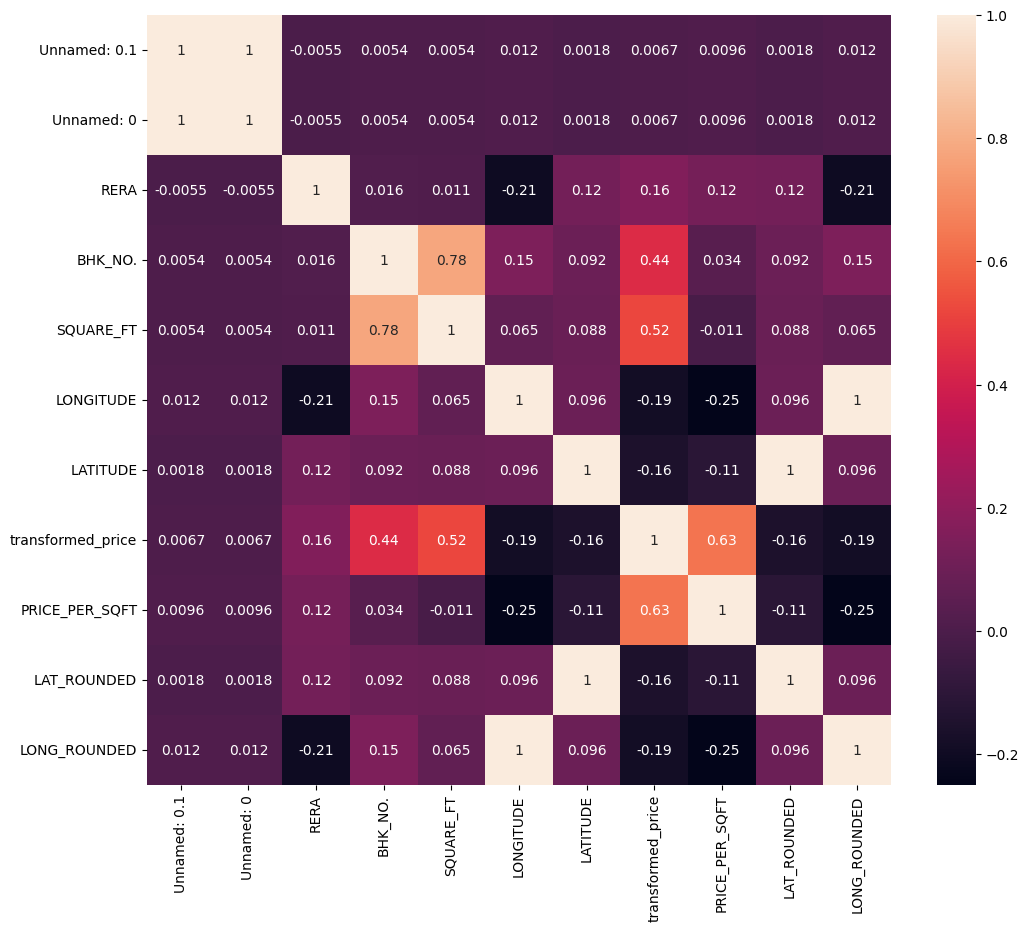

In [11]:
import seaborn as sns
plt.figure(figsize=(12,10))
corr = X_train.select_dtypes(include=['number']).corr()
sns.heatmap(corr,annot=True)
plt.show()

In [14]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [15]:
corr_features=correlation( X_train.select_dtypes(include=['number']).corr(),0.75)

In [16]:
print(corr_features)

{'SQUARE_FT', 'LONG_ROUNDED', 'LAT_ROUNDED', 'Unnamed: 0', 'PRICE_PER_SQFT'}


In [17]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape


((20327, 7), (6776, 7))

In [18]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns only
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Scale them
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)


In [19]:
X_train_scaled

array([[-0.11164691,  1.48106668,  0.92467474,  0.03268301,  1.30158216,
        -0.27638389],
       [ 1.08183681,  1.48106668, -1.73517999, -1.0427635 , -0.3523191 ,
         0.67500765],
       [ 1.04673435, -0.67518904, -0.40525262, -1.10700478,  0.35502056,
         0.09267608],
       ...,
       [-1.62181867, -0.67518904, -0.40525262, -0.99993599, -0.35404012,
         1.09562726],
       [ 0.28456415, -0.67518904, -0.40525262,  0.03506232,  1.29469808,
        -0.53170626],
       [ 1.28772871, -0.67518904, -1.73517999, -1.04990142, -0.31445664,
        -0.57131093]], shape=(20327, 6))

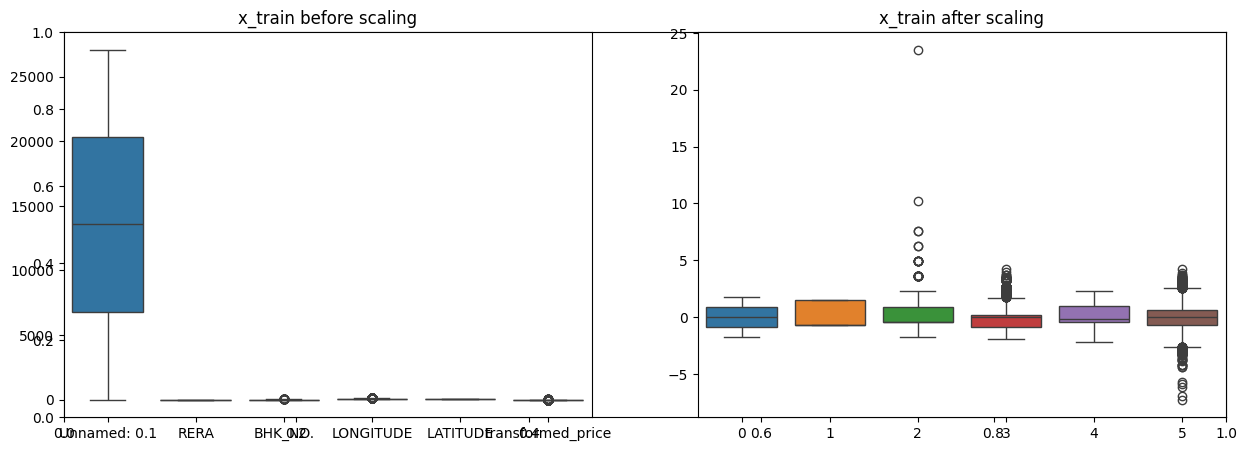

In [20]:
plt.subplots(figsize=(15,5))
plt.subplot(1 , 2, 1)
sns.boxplot(data=X_train)
plt.title('x_train before scaling')
plt.subplot(1 , 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('x_train after scaling')
plt.show()

Mean absolute error 33.48966467112484
r2_score 0.5155269694013386


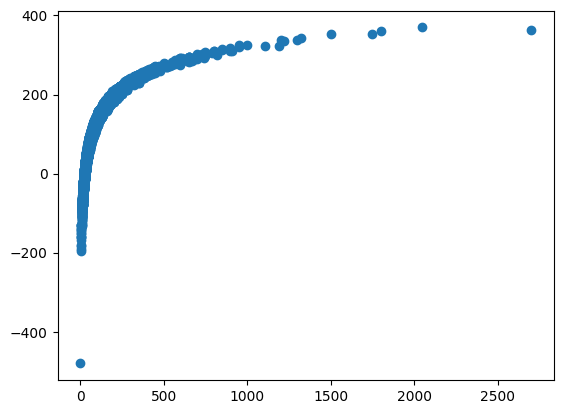

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("r2_score",score)
plt.scatter(y_test,y_pred)
plt.show()

Mean absolute error 33.12246142187163
r2_score 0.5146585711176641


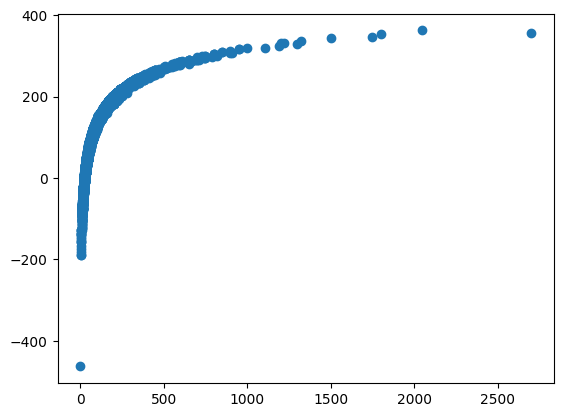

In [22]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("r2_score",score)
plt.scatter(y_test,y_pred)
plt.show()

Mean absolute error 33.48840247250804
r2_score 0.5155253545865939


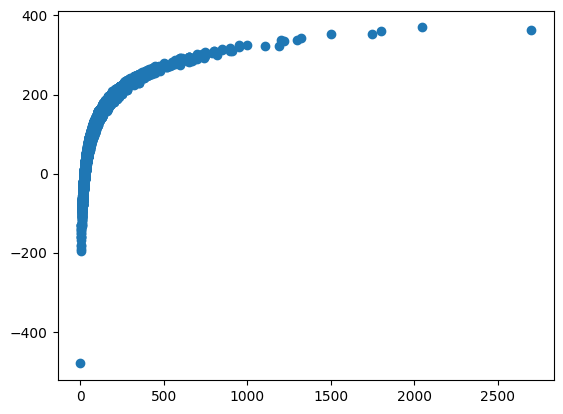

In [23]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("r2_score",score)
plt.scatter(y_test,y_pred)
plt.show()

In [24]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [25]:
lassocv.predict(X_test_scaled)

array([113.42656125,  54.73405949, 270.72313009, ...,  25.8204789 ,
       -26.464002  ,  59.26128214], shape=(6776,))

In [26]:
lassocv.alphas_

array([7.46317817e+01, 6.96018494e+01, 6.49109177e+01, 6.05361391e+01,
       5.64562059e+01, 5.26512466e+01, 4.91027288e+01, 4.57933692e+01,
       4.27070494e+01, 3.98287372e+01, 3.71444136e+01, 3.46410044e+01,
       3.23063167e+01, 3.01289791e+01, 2.80983867e+01, 2.62046495e+01,
       2.44385438e+01, 2.27914678e+01, 2.12553991e+01, 1.98228564e+01,
       1.84868622e+01, 1.72409095e+01, 1.60789299e+01, 1.49952639e+01,
       1.39846333e+01, 1.30421158e+01, 1.21631208e+01, 1.13433672e+01,
       1.05788622e+01, 9.86588232e+00, 9.20095487e+00, 8.58084131e+00,
       8.00252132e+00, 7.46317817e+00, 6.96018494e+00, 6.49109177e+00,
       6.05361391e+00, 5.64562059e+00, 5.26512466e+00, 4.91027288e+00,
       4.57933692e+00, 4.27070494e+00, 3.98287372e+00, 3.71444136e+00,
       3.46410044e+00, 3.23063167e+00, 3.01289791e+00, 2.80983867e+00,
       2.62046495e+00, 2.44385438e+00, 2.27914678e+00, 2.12553991e+00,
       1.98228564e+00, 1.84868622e+00, 1.72409095e+00, 1.60789299e+00,
      

In [27]:
lassocv.mse_path_

array([[14021.12899969, 11497.42291875,  9327.90939688,  9912.07612614,
         9286.64553682],
       [13406.51697963, 10850.9810883 ,  8625.35822212,  9196.06844814,
         8622.47007033],
       [12726.12646831, 10182.25275856,  8015.43197264,  8574.99597456,
         8046.13633451],
       [12131.77561997,  9599.34100477,  7485.99088192,  8036.38044531,
         7546.1130696 ],
       [11612.43169273,  9091.15480145,  7026.48147361,  7569.37651217,
         7112.37702521],
       [11158.48724269,  8648.04189904,  6627.72960369,  7164.55853775,
         6736.21613283],
       [10761.57526776,  8261.60181558,  6281.76048218,  6813.73519872,
         6410.05834269],
       [10414.40837611,  7924.52315989,  5981.64215871,  6509.78826926,
         6127.32278047],
       [10110.63885325,  7630.44211878,  5721.34941423,  6246.53243327,
         5882.2903149 ],
       [ 9844.73690925,  7373.81935342,  5495.64539972,  6018.59338417,
         5669.99100635],
       [ 9611.88474121,  7149.

Mean absolute error 33.45912075578288
r2_score 0.5154960962486805


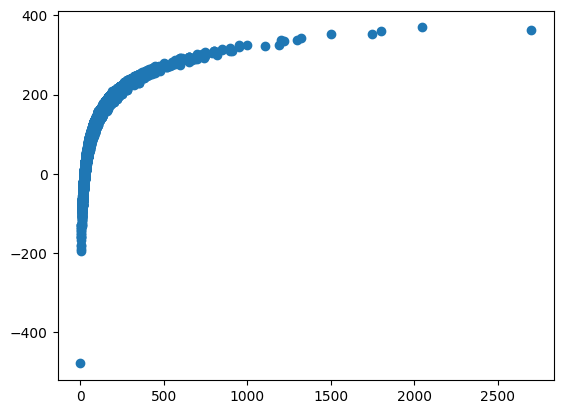

In [29]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("r2_score",score)
plt.show()

Mean absolute error 33.47705004241968
r2_score 0.5155106800081994


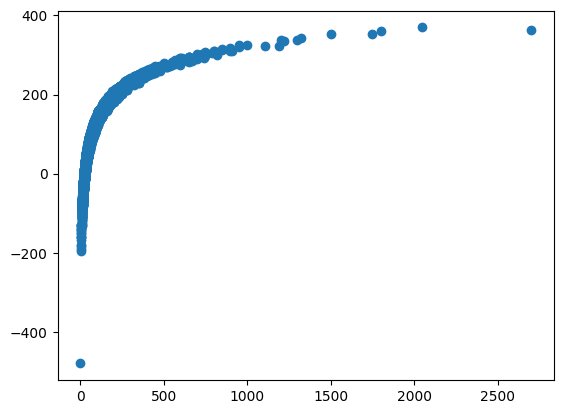

In [30]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("r2_score",score)
plt.show()

In [31]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [32]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

Mean absolute error 29.89676283048884
r2_score 0.4521884151085288


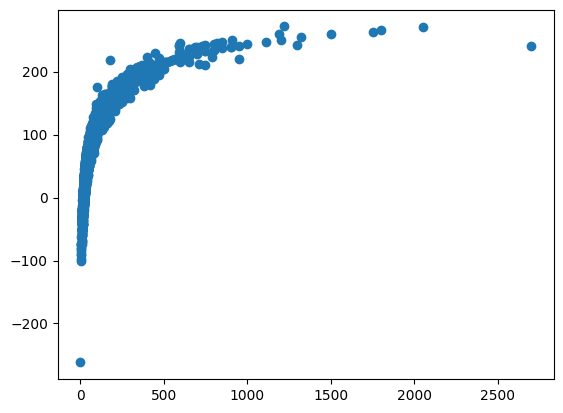

In [33]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("r2_score",score)
plt.scatter(y_test,y_pred)
plt.show()

Mean absolute error 31.937594618039473
r2_score 0.5102674989004046


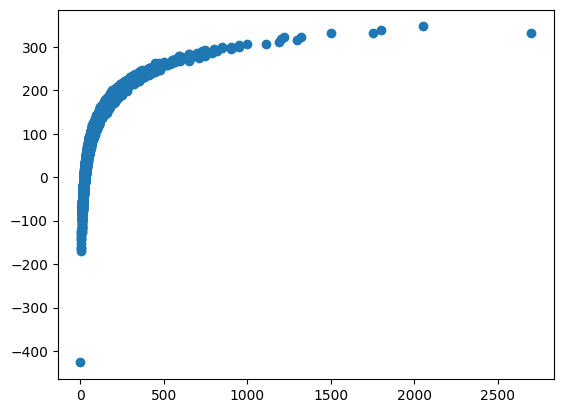

In [34]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("r2_score",score)
plt.show()

In [35]:

elasticcv.alphas_

array([1.49263563e+02, 1.39203699e+02, 1.29821835e+02, 1.21072278e+02,
       1.12912412e+02, 1.05302493e+02, 9.82054576e+01, 9.15867384e+01,
       8.54140988e+01, 7.96574744e+01, 7.42888272e+01, 6.92820089e+01,
       6.46126334e+01, 6.02579581e+01, 5.61967734e+01, 5.24092990e+01,
       4.88770876e+01, 4.55829355e+01, 4.25107982e+01, 3.96457127e+01,
       3.69737244e+01, 3.44818191e+01, 3.21578599e+01, 2.99905278e+01,
       2.79692666e+01, 2.60842316e+01, 2.43262417e+01, 2.26867344e+01,
       2.11577244e+01, 1.97317646e+01, 1.84019097e+01, 1.71616826e+01,
       1.60050426e+01, 1.49263563e+01, 1.39203699e+01, 1.29821835e+01,
       1.21072278e+01, 1.12912412e+01, 1.05302493e+01, 9.82054576e+00,
       9.15867384e+00, 8.54140988e+00, 7.96574744e+00, 7.42888272e+00,
       6.92820089e+00, 6.46126334e+00, 6.02579581e+00, 5.61967734e+00,
       5.24092990e+00, 4.88770876e+00, 4.55829355e+00, 4.25107982e+00,
       3.96457127e+00, 3.69737244e+00, 3.44818191e+00, 3.21578599e+00,
      

In [36]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [37]:
ridge

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [46]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))